In [1]:
#Some basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load data

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [3]:
type(iris_data)

sklearn.utils.Bunch

In [4]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(iris_data.target_names)
print(iris_data.DESCR)

['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ==============

In [6]:
df = pd.DataFrame(data=iris_data.data,columns=iris_data.feature_names) 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['target'] =iris_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Check the packaging

In [8]:
df.shape

(150, 5)

In [9]:
#Check for null values
print(df.isnull().sum())
df.isnull()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


Q. Can you set the columns as 
['sepal_length','sepal_width','petal_length','petal_width','target']

In [11]:
#Ans:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


Q. How many types of flowers do we have and what are their counts?

In [12]:
#describe data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
#Ans.
#Balanced in this case

In [13]:
#Rename the target variable
#Use of Apply
def rename_target(target):
  if target == 0:
    return 'setosa' 
  elif target == 1:
    return 'versicolor' 
  elif target == 2:
    return 'virginica'
  else:
    return target

df.target = df.target.apply(rename_target)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Q. Find the count of flowers that are having sepal length more than 85% of max sepal length and petal length greater than 50% of max petal length.

#Univariate Analysis

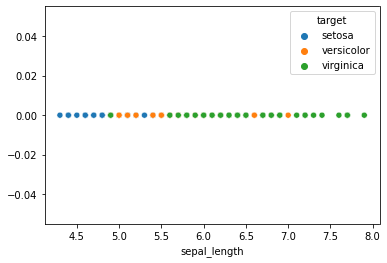

In [14]:
#Seaborn: https://seaborn.pydata.org/
sns.scatterplot(data=df, x='sepal_length', y=np.zeros_like(df.sepal_length), hue='target')
#hue parameter determines which column in the data frame should be used for colour encoding

#Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


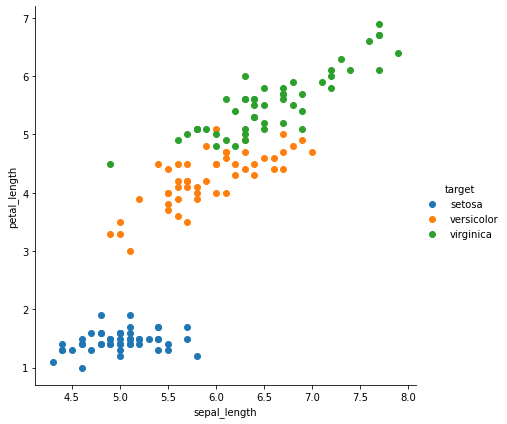

In [22]:
sns.FacetGrid(df,hue="target",size=6).map(plt.scatter,'sepal_length','petal_length').add_legend()

Q. Based on which features can we separate setosa from virginica?

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


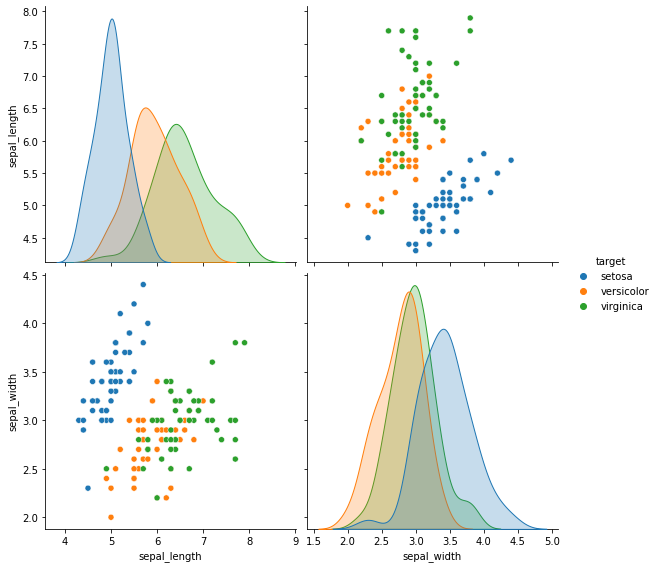

In [23]:
sns.pairplot(df,vars =['sepal_length','sepal_width'],hue='target',size=4)

In [ ]:
#!pip install pandas_profiling
!pip install pandas-profiling==2.8.0

In [26]:
from pandas_profiling import ProfileReport
#https://github.com/pandas-profiling/pandas-profiling

In [27]:
profile = ProfileReport(df)
profile.to_file("output.html")
#profile.to_widgets()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
#Based on profiling report.
df.drop_duplicates(keep='first')

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


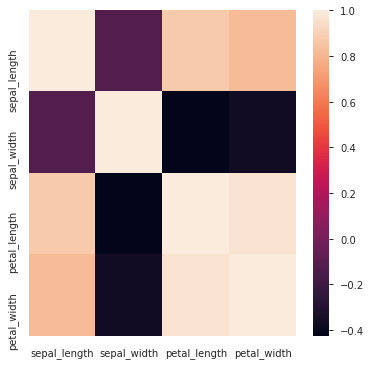

In [30]:
plt.figure(figsize= (6, 6))
sns.heatmap(df.corr())

In [31]:
from google.colab import files
uploaded = files.upload()
#Automobile Dataset
#https://archive.ics.uci.edu/ml/datasets/Automobile

Saving automobile.csv to automobile.csv


In [32]:
col_name = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
data = pd.read_csv('automobile.csv',names = col_name)
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [33]:
#checking the first 5 and last 5 rows
data.head(-5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420



Q. What is the distribution of cars for symboling values?

In [79]:
#Ans

Text(0.5, 0, 'Symboling')

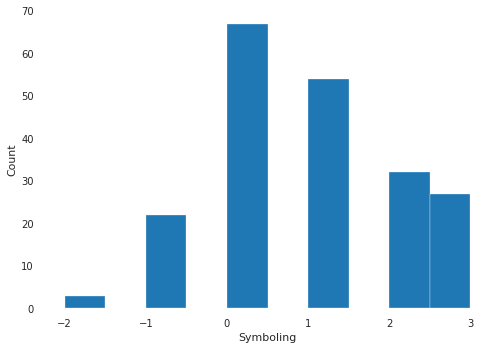

In [34]:
#Finding distribution of cars based on symboling stat
plt.hist(data.symboling)
plt.ylabel('Count')
plt.xlabel('Symboling')

In [ ]:
#Relation between Price and Symboling

Text(0.5, 0, 'Symboling')

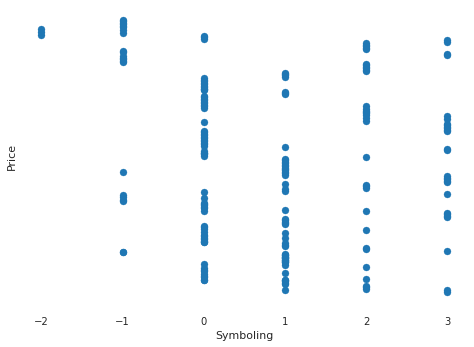

In [35]:
plt.scatter(data.symboling,data.price)
plt.yticks([])
plt.ylabel('Price')
plt.xlabel('Symboling')

Q. Plot the count for body-style column

Text(0, 0.5, 'Count')

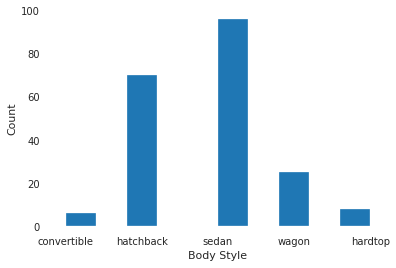

In [125]:
#Ans

Q. What if we want to find relation between body-style and safety rating/

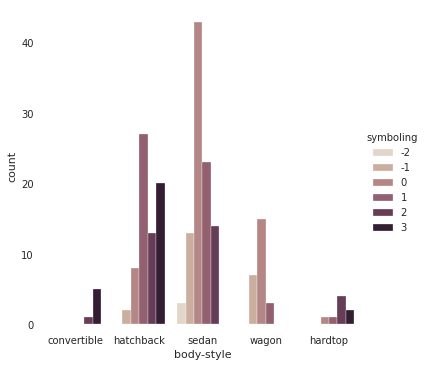

In [36]:
sns.catplot(x='body-style', kind="count",hue='symboling', palette="ch:.25", data = data)

In [37]:
#Creating smafe-label based on symboling value
data['safe-label'] = data.symboling.apply(lambda x:'safe' if x<=0 else 'unsafe')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,safe-label
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,unsafe
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,unsafe
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,unsafe
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,unsafe
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,unsafe


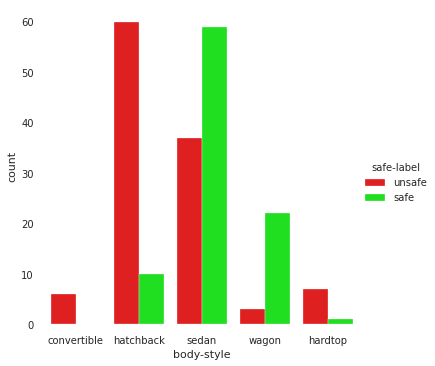

In [38]:
palette = ["#FF0000", "#00FF00"]
sns.catplot(x="body-style",palette=palette,hue="safe-label",kind="count",data=data)

Q. Can you find the symboling stats for cars that are safe?

In [132]:
#Ans

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


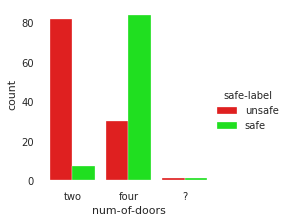

In [39]:
#Relation of symboling with number of doors
palette = ["#FF0000", "#00FF00"]
sns.catplot(x="num-of-doors", data=data, hue="safe-label", kind="count", size=3, palette=palette )

In [40]:
data['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

In [41]:
#Searching ? in entire data
data.isin(['?']).sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
safe-label            0
dtype: int64

Q. Find car distribution by drive-wheel and body-style and give the symboling count

In [139]:
#Ans

symboling
drive-wheels body-style            
4wd          hatchback            2
             sedan                3
             wagon                4
fwd          convertible          1
             hardtop              1
             hatchback           49
             sedan               57
             wagon               12
rwd          convertible          5
             hardtop              7
             hatchback           19
             sedan               36
             wagon                9

In [42]:
#Plot relation between Drive wheels and the car body type
data['drive-wheel-num'] = data['drive-wheels'].map({"fwd": 1, "rwd": 2, "4wd": 3})
drw_bs =data.groupby(by=['body-style','drive-wheels'],as_index=False)['drive-wheels'].size()
drw_bs

,body-style,drive-wheels,size
0,convertible,fwd,1
1,convertible,rwd,5
2,hardtop,fwd,1
3,hardtop,rwd,7
4,hatchback,4wd,2
5,hatchback,fwd,49
6,hatchback,rwd,19
7,sedan,4wd,3
8,sedan,fwd,57
9,sedan,rwd,36


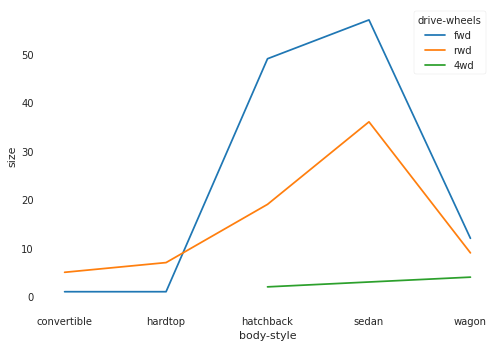

In [43]:
sns.lineplot(x='body-style',y='size', data=drw_bs, hue="drive-wheels")

#Assignment
1. Do analysis of various features wrt price of the car

2. Do analysis on the Titanic Dataset <br>
clue: survival vs gender, survival vs passenger class, survival vs age, survival vs embarked category

In [147]:
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [148]:
#Titanic Dataset
df_titanic = pd.read_csv('titanic_train.csv')

In [149]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
